# 1. Imports

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data source file

In [21]:
df_raw = pd.read_csv('dataset/train.csv')
df = df_raw.copy()
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. EDA

## 2.1 Données manquantes

In [22]:
# Somme totale des valeurs manquantes dans le dataframe
total_missing = df.isna().sum().sum()
print(f"Il y a {total_missing} valeurs manquantes dans le dataset.")

# Taille du dataframe
df_size = df.size
print(f"Le dataset contient {df_size} valeurs.")

# Separator
print("-" * 50)

# Pourcentage de valeurs manquantes
missing_percentage = total_missing / df_size * 100
print(f"Le dataset contient {missing_percentage:.2f}% de valeurs manquantes.")

Il y a 7829 valeurs manquantes dans le dataset.
Le dataset contient 118260 valeurs.
--------------------------------------------------
Le dataset contient 6.62% de valeurs manquantes.


## 2.2 Histogramme

### 2.2.1 SalePrice

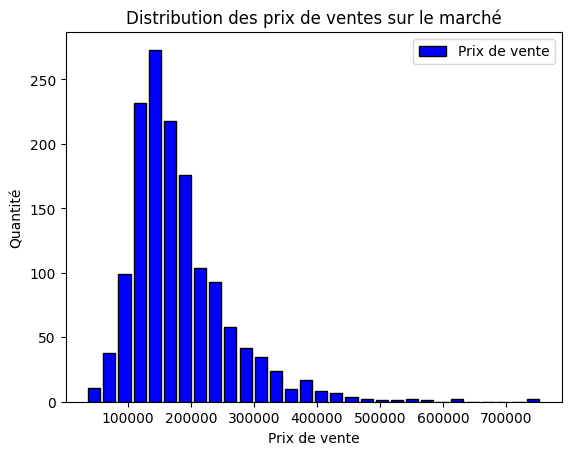

In [23]:
plt.hist(df['SalePrice'],
         bins=30,
         rwidth=0.8,
         color='blue',
         edgecolor='black',
         label='Prix de vente')
plt.xlabel('Prix de vente')
plt.ylabel('Quantité')
plt.title('Distribution des prix de ventes sur le marché')
plt.legend()
plt.show()

### 2.2.2 Corrélation et Histogramme

In [24]:
# Normalisation Min Max
df['SalePrice'] = (df['SalePrice'] - df['SalePrice'].min()) / (df['SalePrice'].max() - df['SalePrice'].min())
df['GrLivArea'] = (df['GrLivArea'] - df['GrLivArea'].min()) / (df['GrLivArea'].max() - df['GrLivArea'].min())

In [25]:
print(df[['SalePrice', 'GrLivArea']].head())

   SalePrice  GrLivArea
0   0.241078   0.259231
1   0.203583   0.174830
2   0.261908   0.273549
3   0.145952   0.260550
4   0.298709   0.351168


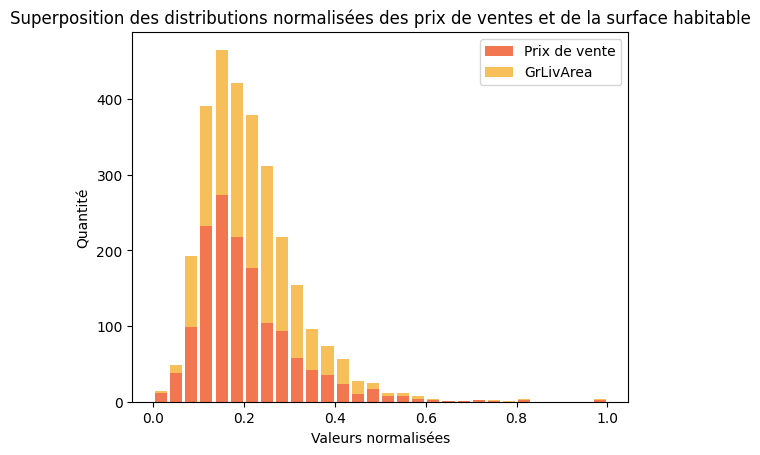

In [26]:
plt.hist([df['SalePrice'], df['GrLivArea']],         
         bins=30,
         rwidth=0.8,
         color=['#f27750', '#f7bf59'],
         histtype = 'barstacked',
         label=['Prix de vente', 'GrLivArea'])
plt.xlabel('Valeurs normalisées')
plt.ylabel('Quantité')
plt.title('Superposition des distributions normalisées des prix de ventes et de la surface habitable')
plt.legend()
plt.show()

// Analyse du graphique :
En superposant les valeurs normalisées des Prix de Vente avec la surface habitable, on peut constater que les deux distributions semblent suivrent la même loi de probabilité normale avec une asymétrie positive ayant une tendance centrale (soit le mode) située entre la position en abscisse 0.16 et 0.2 environ. Ce qui pourrait indiquer qu'un grand nombre de transactions de logements correspondent à une valeur relativement faible en prix et surface habitable par rapport à la plage totale de l'ensemble des données et qu'à partir de ce seuil : plus la surface habitable et le prix augmente et moins sont nombreuses les transactions.
On pourrait donc déduire que les deux variables sont corrélées, toutefois cet histogramme ne nous donne pas d'indicateurs pertinents et précis comme des indicateurs de position (quantiles par exemple) ou de dispersion (écart-type ou variance par exemple). Pour confirmer cela, il serait nécessaire de comparer ces variables avec des boxplots ou des Q-Q plots voire même de calculer le coefficient de corrélation.

### 2.2.3 Histogramme 2D

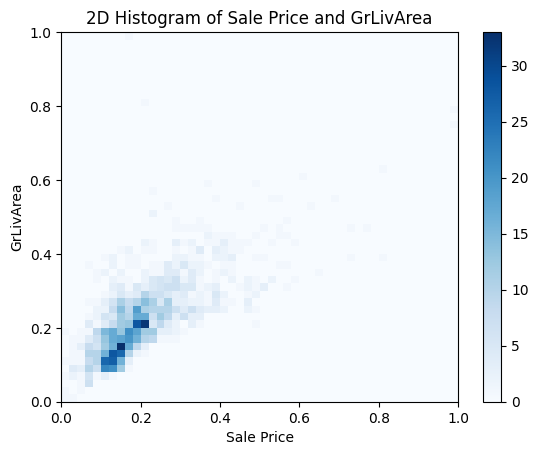

In [33]:
plt.hist2d(df['SalePrice'], df['GrLivArea'], bins=50, cmap='Blues')
plt.colorbar()
plt.xlabel('Sale Price')
plt.ylabel('GrLivArea')
plt.title('2D Histogram of Sale Price and GrLivArea')
plt.show()

// Interprétation :
La majorité des valeurs des variables PriceSale et GrLivArea ayant une densité forte sont concentrées dans une zone avec des observations basses: ce qui peut signifier que les deux variables ont tendance à prendre des valeurs basses ensemble. On remarque également une courte linéarité ascendante indiquant une relation positive entre les deux variables mais s'estompant progressivement, ce qui pourrait suggérer que les prix des logements augmentent avec la superficie habitable mais que d'autres facteurs influencent cette relation.

## 2.3 Scatter et corrélation

In [34]:
df = pd.read_csv('dataset/train.csv')

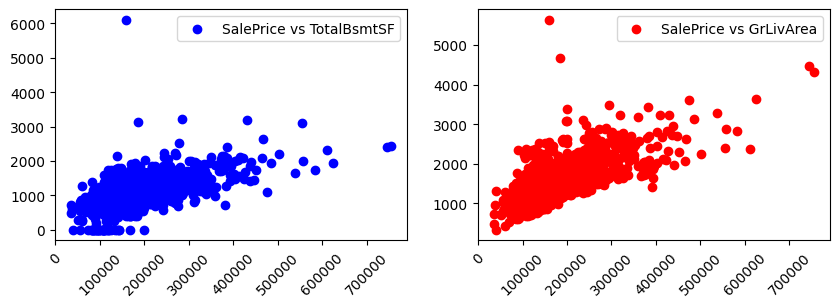

In [35]:
fig = plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(df['SalePrice'], df['TotalBsmtSF'], color='blue', label='SalePrice vs TotalBsmtSF')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(122)
plt.scatter(df['SalePrice'], df['GrLivArea'], color='red', label='SalePrice vs GrLivArea')
plt.xticks(rotation=45)
plt.legend()

plt.show()

// Analyse des deux graphiques et relation entre les deux données

## 2.4 Boxplots et distribution conditionnelle

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


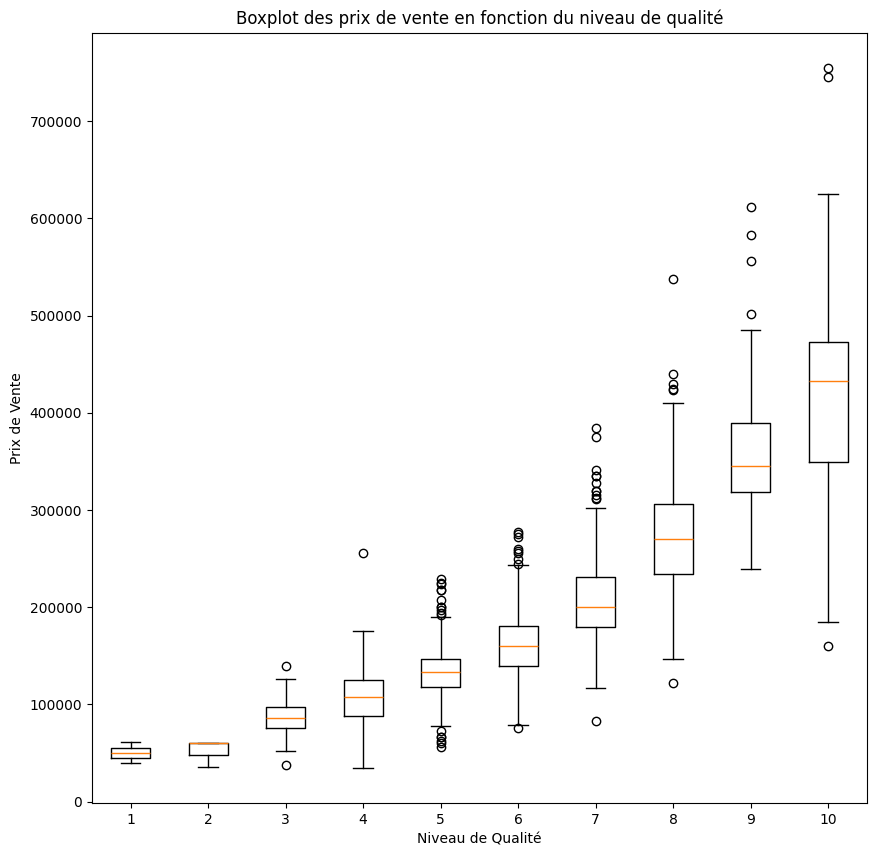

In [60]:
# Liste des valeurs uniques de la colonne 'OverallQual' triées par ordre croissant
sort_overallqual_unique = sorted([int(x) for x in df['OverallQual'].unique()])
print(sorted(sort_overallqual_unique))

# Liste des prix de vente pour chaque niveau de qualité
list_prices_per_each_qual=[df[df['OverallQual'] == each_qual]['SalePrice'] for each_qual in sort_overallqual_unique]

# Création des boxplots pour chaque niveau de qualité
fig = plt.figure(figsize=(10,10))
plt.boxplot(list_prices_per_each_qual)
plt.xticks(range(1,len(df['OverallQual'].unique())+1),sort_overallqual_unique)
plt.xlabel('Niveau de Qualité')
plt.ylabel('Prix de Vente')
plt.title('Boxplots des prix de vente en fonction du niveau de qualité')

plt.show()

// Explication disparité croissante en fonction de la qualité de finition :

# 3. Synthèse

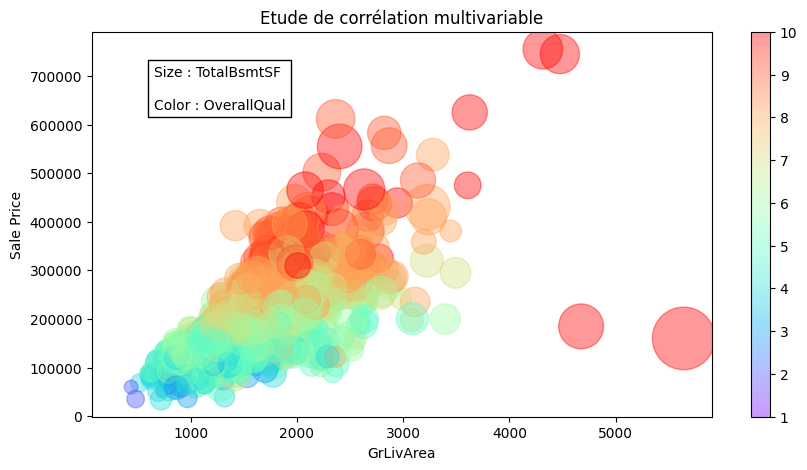

In [100]:
plt.figure(figsize=(10, 5))
plt.scatter(
    df['GrLivArea'], 
    df['SalePrice'], 
    c = df['OverallQual'],
    s = df['TotalBsmtSF']/3,
    cmap='rainbow',
    alpha=0.4
    )

plt.text(
    0.1,
    0.8,
    "Size : TotalBsmtSF\n\nColor : OverallQual",
    bbox = dict(
        facecolor='white',
        edgecolor='black'
        ),
    transform=plt.gca().transAxes)

plt.colorbar()
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Etude de corrélation multivariable')
plt.show()